# Pupillometry
This notebook takes in three csv files taken from the Pupil Recordings you have exported in Pupil Player. These are:
- `annotations.csv` (contains annotations that indicates important events during the recording)
- `pupil_positions.csv` (contains raw data in regards to the pupil throughout the recording)
- `info.player.json` (contains system and sync time used to format the recording timestamps)

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import json
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning)

# File Paths
info_player_filePath = 'source/info.player.json'
pupil_csv_filePath = 'source/pupil_positions.csv'
annotations_filepath = 'source/annotations.csv'

C:\Users\jhund\AppData\Local\Temp\ipykernel_26412\3188771895.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Converting timestamps into time (starting from 0)
def convert_timestamps_to_time(df, timestamp_column, offset):
    df['time'] = df[timestamp_column] + offset
    df['time'] -= df['time'].min()
    return df

In [3]:
with open(info_player_filePath, 'r') as file:
    data = json.load(file)

start_time_synced_s = data.get('start_time_synced_s')
start_time_system_s = data.get('start_time_system_s')

offset = start_time_system_s - start_time_synced_s
print(f"Offset between system and synced start time: {offset}")

pupil_df = pd.read_csv(pupil_csv_filePath)
print(f"There is a total of {len(pupil_df)} in the Pupil DataFrame")

pupil_df = convert_timestamps_to_time(pupil_df, 'pupil_timestamp', offset)
print(pupil_df['time'])

Offset between system and synced start time: 1709032090.1018684
There is a total of 5920 in the Pupil DataFrame
0        0.000000
1        0.000000
2        0.003781
3        0.003781
4        0.007718
          ...    
5915    12.463825
5916    12.471877
5917    12.471877
5918    12.479998
5919    12.479998
Name: time, Length: 5920, dtype: float64


In [4]:
left_df = pupil_df[pupil_df['eye_id'] == 0]
right_df = pupil_df[pupil_df['eye_id'] == 1]

print(left_df)
print(right_df)

      pupil_timestamp  world_index  eye_id  confidence  norm_pos_x  \
0         6742.094903            0       0    0.835392    0.574685   
1         6742.094903            0       0    0.835392    0.574523   
4         6742.102621            1       0    0.780029    0.575378   
5         6742.102621            1       0    0.780029    0.575406   
8         6742.110705            1       0    0.756568    0.574743   
...               ...          ...     ...         ...         ...   
5915      6754.558728          879       0    0.840523    0.621468   
5916      6754.566780          879       0    0.813928    0.620744   
5917      6754.566780          879       0    0.813928    0.620803   
5918      6754.574901          880       0    0.814369    0.620823   
5919      6754.574901          880       0    0.814369    0.620920   

      norm_pos_y   diameter                 method  ellipse_center_x  \
0       0.391666  30.194841  pye3d 0.3.0 real-time        110.339547   
1       0.39164

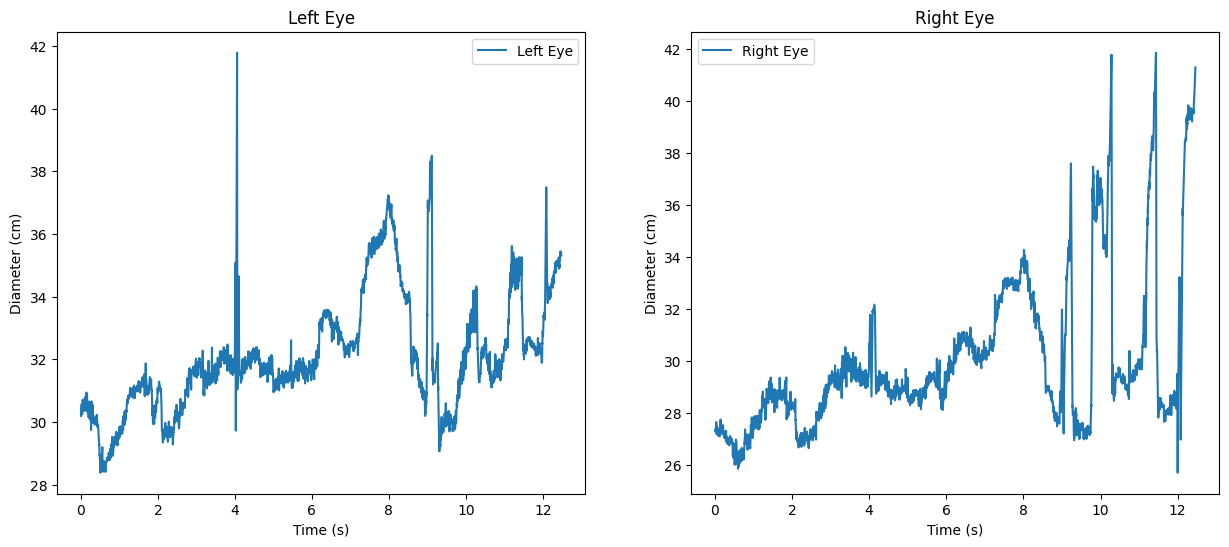

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].plot(left_df['time'], left_df['diameter'], label='Left Eye')
axs[0].set_title('Left Eye')

axs[1].plot(right_df['time'], right_df['diameter'], label='Right Eye')
axs[1].set_title('Right Eye')

for ax in axs:
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Diameter (cm)')
    ax.legend()

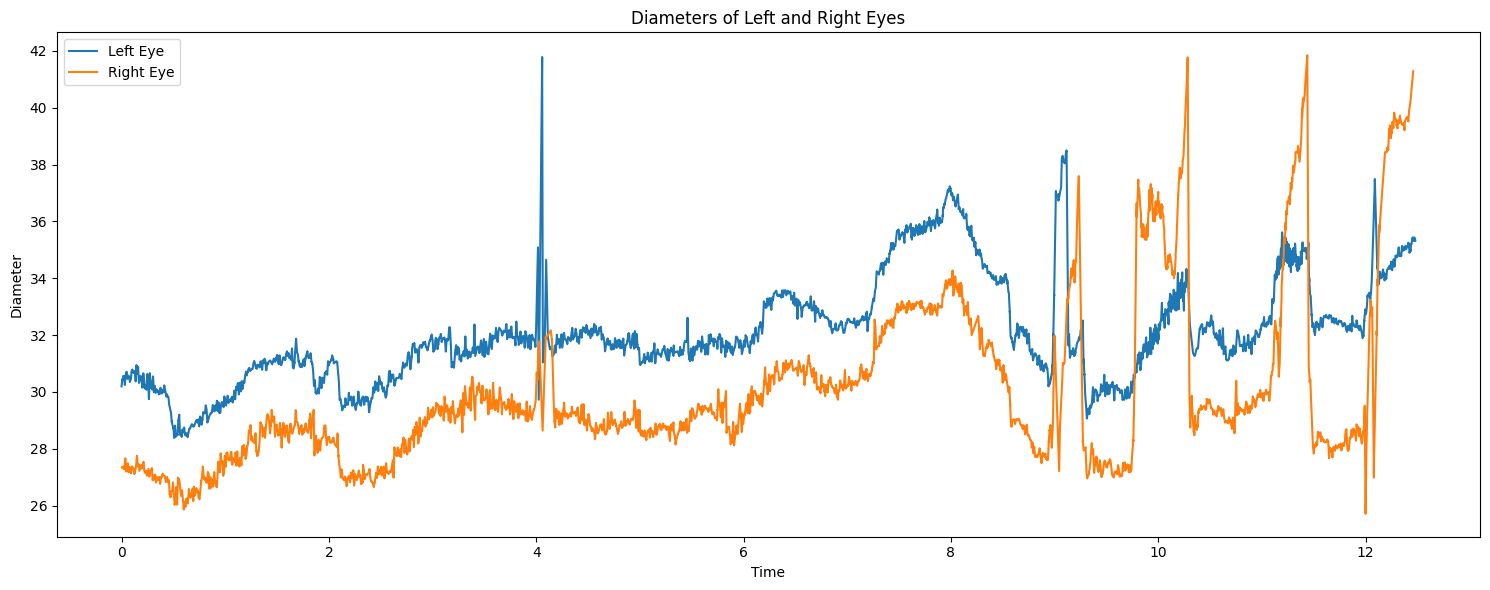

In [6]:
# Plot both smoothed diameters on the same graph
plt.figure(figsize=(15, 6))

plt.plot(left_df['time'], left_df['diameter'], label='Left Eye')
plt.plot(right_df['time'], right_df['diameter'], label='Right Eye')

plt.title('Diameters of Left and Right Eyes')
plt.xlabel('Time')
plt.ylabel('Diameter')
plt.legend()

plt.tight_layout()
plt.show()

C:\Users\jhund\AppData\Local\Temp\ipykernel_26412\287779325.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_df['smoothed_diameter'] = left_df['diameter'].rolling(window=window).mean()
C:\Users\jhund\AppData\Local\Temp\ipykernel_26412\287779325.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_df['smoothed_diameter'] = right_df['diameter'].rolling(window=window).mean()


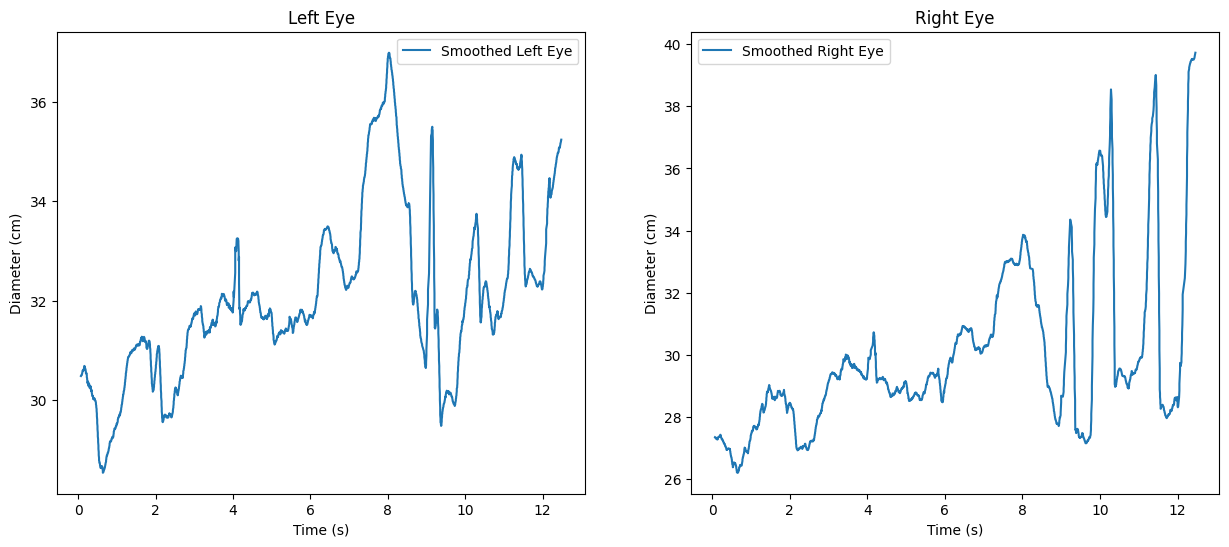

In [7]:
window = 20
left_df['smoothed_diameter'] = left_df['diameter'].rolling(window=window).mean()
right_df['smoothed_diameter'] = right_df['diameter'].rolling(window=window).mean()

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].plot(left_df['time'], left_df['smoothed_diameter'], label='Smoothed Left Eye')
axs[0].set_title('Left Eye')

axs[1].plot(right_df['time'], right_df['smoothed_diameter'], label='Smoothed Right Eye')
axs[1].set_title('Right Eye')

for ax in axs:
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Diameter (cm)')
    ax.legend()

C:\Users\jhund\AppData\Local\Temp\ipykernel_26412\3493357847.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_df['smoothed_diameter'] = left_df['diameter'].rolling(window=window).mean()
C:\Users\jhund\AppData\Local\Temp\ipykernel_26412\3493357847.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_df['smoothed_diameter'] = right_df['diameter'].rolling(window=window).mean()


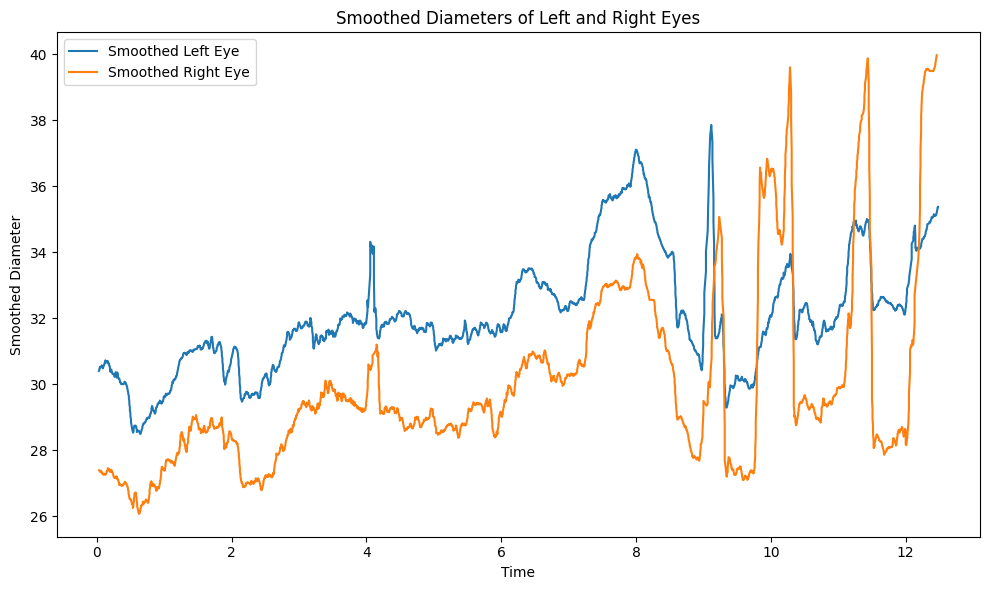

In [8]:
window = 10

# Calculate smoothed diameters
left_df['smoothed_diameter'] = left_df['diameter'].rolling(window=window).mean()
right_df['smoothed_diameter'] = right_df['diameter'].rolling(window=window).mean()

# Plot both smoothed diameters on the same graph
plt.figure(figsize=(10, 6))

plt.plot(left_df['time'], left_df['smoothed_diameter'], label='Smoothed Left Eye')
plt.plot(right_df['time'], right_df['smoothed_diameter'], label='Smoothed Right Eye')

plt.title('Smoothed Diameters of Left and Right Eyes')
plt.xlabel('Time')
plt.ylabel('Smoothed Diameter')
plt.legend()

plt.tight_layout()
plt.show()